In [31]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler

In [13]:
df_standartized = pd.read_csv("../data/df_standartized.csv")

df_standartized.head(5)

,Individual,Round,Phase,Puzzler,Cohort,frustrated,upset,hostile,alert,ashamed,...,EDA_TD_T_AUC,EDA_TD_T_Kurtosis,EDA_TD_T_Skew,EDA_TD_T_Slope_min,EDA_TD_T_Slope_max,EDA_TD_T_Slope_mean,EDA_TD_T_Slope,EDA_TD_P_Peaks,EDA_TD_P_RT,EDA_TD_P_ReT
0,1,round_3,phase3,1,D1_4,2.0,1.0,1.0,2.0,1.0,...,-0.674626,0.276417,-1.310763,0.595726,-0.667286,0.135978,0.096659,-1.012991,1.133924,0.099359
1,1,round_3,phase2,1,D1_4,3.0,2.0,1.0,3.0,2.0,...,-0.674647,0.136077,0.945391,0.595677,-0.666593,0.135187,0.095006,-0.689332,0.467018,0.290207
2,1,round_3,phase1,1,D1_4,2.0,1.0,1.0,2.0,1.0,...,-0.680703,-0.072207,0.568117,0.596330,-0.667436,0.130645,0.091310,-1.093906,-0.056367,0.158108
3,1,round_2,phase3,1,D1_4,2.0,1.0,1.0,2.0,1.0,...,-0.677889,0.625703,1.341971,0.589771,-0.658566,0.129049,0.090101,-0.932077,-0.242008,-0.339003
4,1,round_2,phase2,1,D1_4,2.0,3.0,1.0,3.0,2.0,...,-0.677829,0.230709,1.690908,0.590443,-0.662295,0.138101,0.098103,-0.284758,-0.401715,-0.142285


In [14]:
metrics_cols = ["HR", "TEMP", "EDA"]
df_metrics = df_standartized[[col for col in df_standartized.columns if any(col.startswith(metric) for metric in metrics_cols)]]

df_metrics.head(5)

,HR_TD_Mean,HR_TD_Median,HR_TD_std,HR_TD_Min,HR_TD_Max,HR_TD_AUC,HR_TD_Kurtosis,HR_TD_Skew,HR_TD_Slope_min,HR_TD_Slope_max,...,EDA_TD_T_AUC,EDA_TD_T_Kurtosis,EDA_TD_T_Skew,EDA_TD_T_Slope_min,EDA_TD_T_Slope_max,EDA_TD_T_Slope_mean,EDA_TD_T_Slope,EDA_TD_P_Peaks,EDA_TD_P_RT,EDA_TD_P_ReT
0,0.010023,-0.062352,0.187214,-0.163880,0.001629,-0.312526,-0.621392,-0.007322,-0.414857,0.978121,...,-0.674626,0.276417,-1.310763,0.595726,-0.667286,0.135978,0.096659,-1.012991,1.133924,0.099359
1,-0.176801,-0.069806,-0.793634,0.111690,-0.570809,-0.086288,-0.114281,-0.045281,0.532375,-0.699948,...,-0.674647,0.136077,0.945391,0.595677,-0.666593,0.135187,0.095006,-0.689332,0.467018,0.290207
2,-0.033122,0.038688,-0.774299,0.369032,-0.544302,-0.988619,-0.336389,-0.740408,-0.158848,-0.343025,...,-0.680703,-0.072207,0.568117,0.596330,-0.667436,0.130645,0.091310,-1.093906,-0.056367,0.158108
3,0.398059,0.532294,0.163883,0.068800,0.206917,0.153083,-0.486637,-0.513035,0.263566,0.280258,...,-0.677889,0.625703,1.341971,0.589771,-0.658566,0.129049,0.090101,-0.932077,-0.242008,-0.339003
4,-0.551609,-0.376240,-0.671610,-0.410499,-0.703343,-0.311621,0.152870,-1.139046,0.500374,-0.385643,...,-0.677829,0.230709,1.690908,0.590443,-0.662295,0.138101,0.098103,-0.284758,-0.401715,-0.142285


In [15]:
emotion_cols = ["frustrated", "upset", "hostile", "alert", "ashamed",
                "inspired", "nervous", "attentive", "afraid", "active", "determined"]

df_emotions = df_standartized[emotion_cols]

scaler = StandardScaler()
# numpy to df
df_emotions = pd.DataFrame(scaler.fit_transform(df_emotions) , columns=df_emotions.columns, index=df_emotions.index)

df_emotions.head(5)

,frustrated,upset,hostile,alert,ashamed,inspired,nervous,attentive,afraid,active,determined
0,-0.011314,-0.561405,-0.212664,-0.185738,-0.403467,-0.179736,1.073432,0.194047,-0.18876,-0.472819,-0.830872
1,0.492979,1.060431,-0.212664,0.780100,1.420907,-0.179736,1.073432,0.194047,-0.18876,0.382104,0.079270
2,-0.011314,-0.561405,-0.212664,-0.185738,-0.403467,0.797777,1.073432,0.194047,3.48026,0.382104,0.079270
3,-0.011314,-0.561405,-0.212664,-0.185738,-0.403467,0.797777,1.073432,0.194047,3.48026,0.382104,0.079270
4,-0.011314,2.682266,-0.212664,0.780100,1.420907,0.797777,2.808721,1.094771,3.48026,1.237027,0.989413


# PCA (emotions only)

In [19]:
# df to numpy
X = df_emotions.to_numpy()
n, p = np.shape(X)

# centering
mu = np.mean(X, axis = 0)
Xc = X - np.ones((n,1))*mu

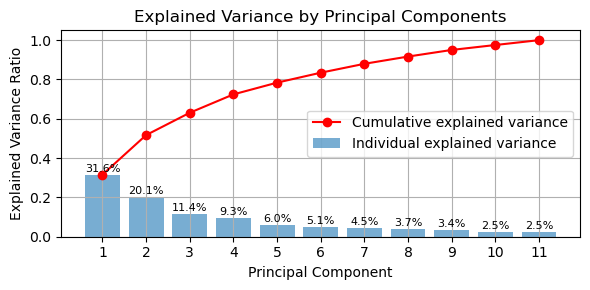

In [34]:
# Fit PCA to standardized data
pca = PCA()
X_pca = pca.fit_transform(X)

# Explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot
plt.figure(figsize=(6, 3))

# Bar plot of individual explained variance
bars = plt.bar(range(1, len(explained_variance)+1), explained_variance, alpha=0.6, label='Individual explained variance')

# Line plot of cumulative explained variance
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o', linestyle='-', color='red', label='Cumulative explained variance')

# Add percentage labels on top of bars
for i, ev in enumerate(explained_variance):
    plt.text(i + 1, ev + 0.005, f"{ev * 100:.1f}%", ha='center', va='bottom', fontsize=8)

plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Principal Components')
plt.xticks(range(1, len(explained_variance)+1))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

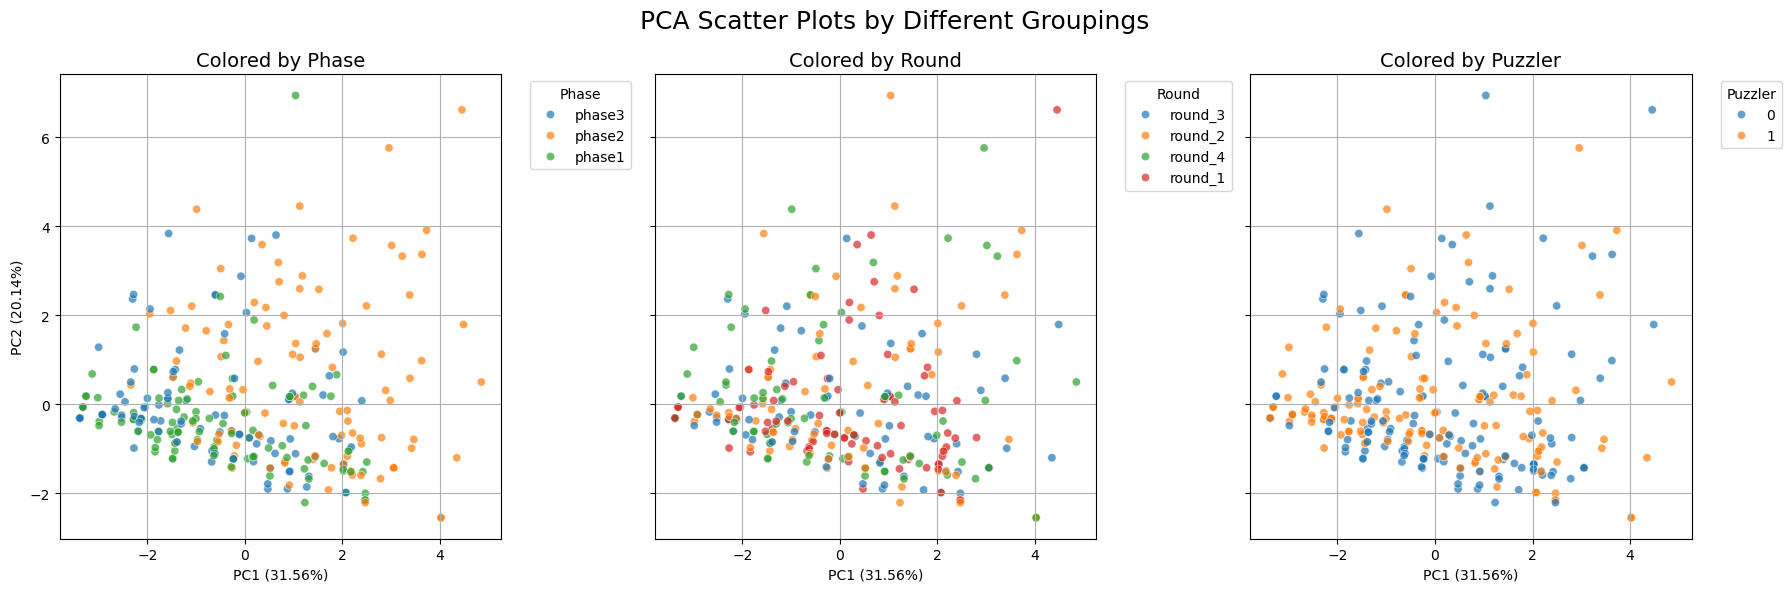

In [33]:
# Fit PCA
pca = PCA()
X_pca = pca.fit_transform(X)

# Create DataFrame for plotting
pc_cols = [f'PC{i+1}' for i in range(X_pca.shape[1])]
df_pca = pd.DataFrame(X_pca, columns=pc_cols)
df_pca['Phase'] = df_standartized['Phase'].values
df_pca['Round'] = df_standartized['Round'].values
df_pca['Puzzler'] = df_standartized['Puzzler'].values

# Variance explained for labels
pc1_var = pca.explained_variance_ratio_[0] * 100
pc2_var = pca.explained_variance_ratio_[1] * 100

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharex=True, sharey=True)

for ax, col, title in zip(axes, ['Phase', 'Round', 'Puzzler'], ['Phase', 'Round', 'Puzzler']):
    sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue=col, palette='tab10', alpha=0.7, ax=ax)
    ax.set_title(f'Colored by {title}', fontsize=14)
    ax.set_xlabel(f'PC1 ({pc1_var:.2f}%)')
    ax.set_ylabel(f'PC2 ({pc2_var:.2f}%)')
    ax.legend(title=col, bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.grid(True)

plt.suptitle("PCA Scatter Plots by Different Groupings", fontsize=18)
plt.tight_layout()
plt.show()

# PCA (metrics only)

In [35]:
# df to numpy
X = df_metrics.to_numpy()
n, p = np.shape(X)

# centering
mu = np.mean(X, axis = 0)
Xc = X - np.ones((n,1))*mu

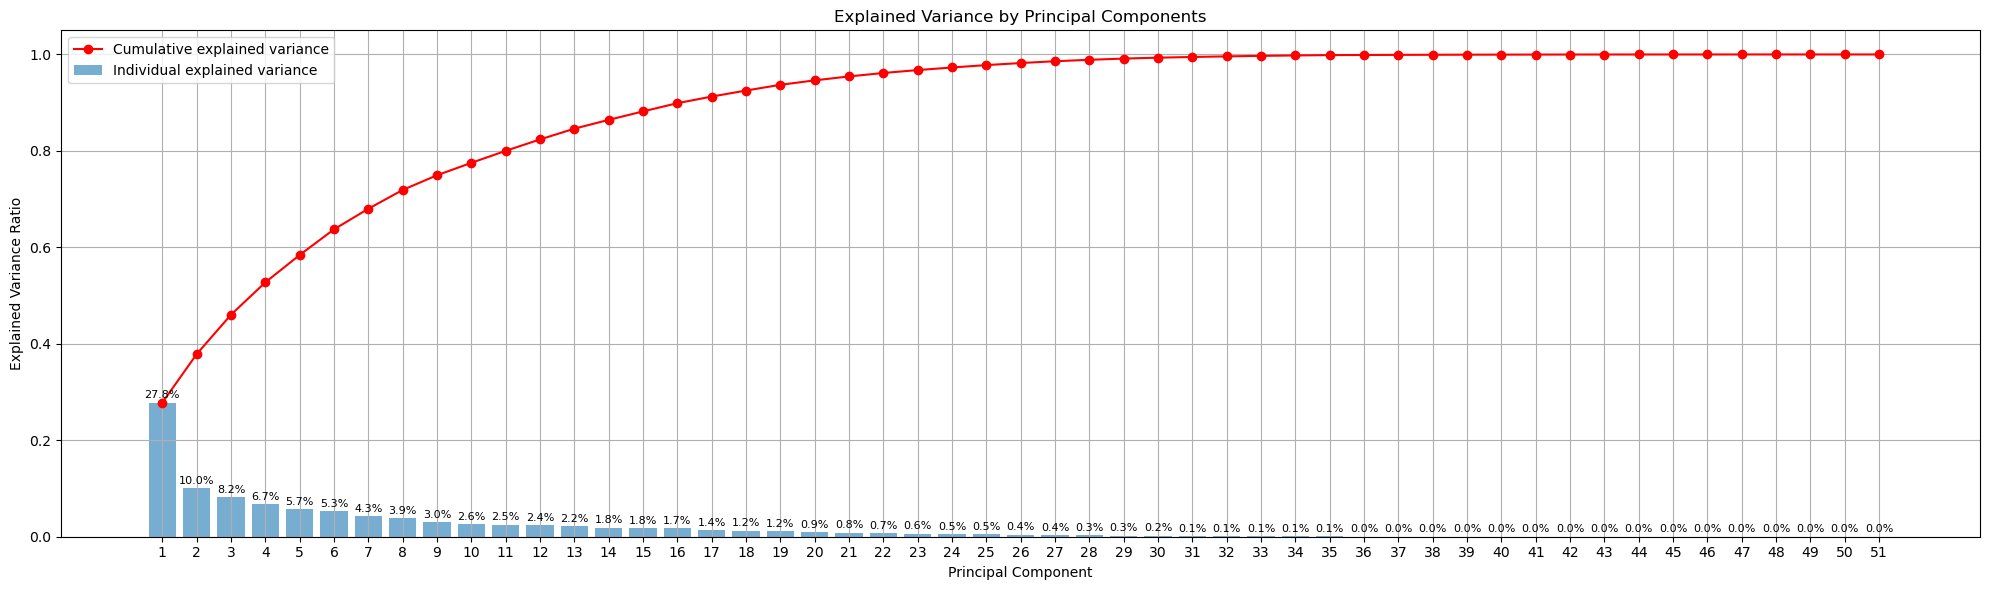

In [41]:
# Fit PCA to standardized data
pca = PCA()
X_pca = pca.fit_transform(X)

# Explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot
plt.figure(figsize=(20, 6))

# Bar plot of individual explained variance
bars = plt.bar(range(1, len(explained_variance)+1), explained_variance, alpha=0.6, label='Individual explained variance')

# Line plot of cumulative explained variance
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o', linestyle='-', color='red', label='Cumulative explained variance')

# Add percentage labels on top of bars
for i, ev in enumerate(explained_variance):
    plt.text(i + 1, ev + 0.005, f"{ev * 100:.1f}%", ha='center', va='bottom', fontsize=8)

plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Principal Components')
plt.xticks(range(1, len(explained_variance)+1))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

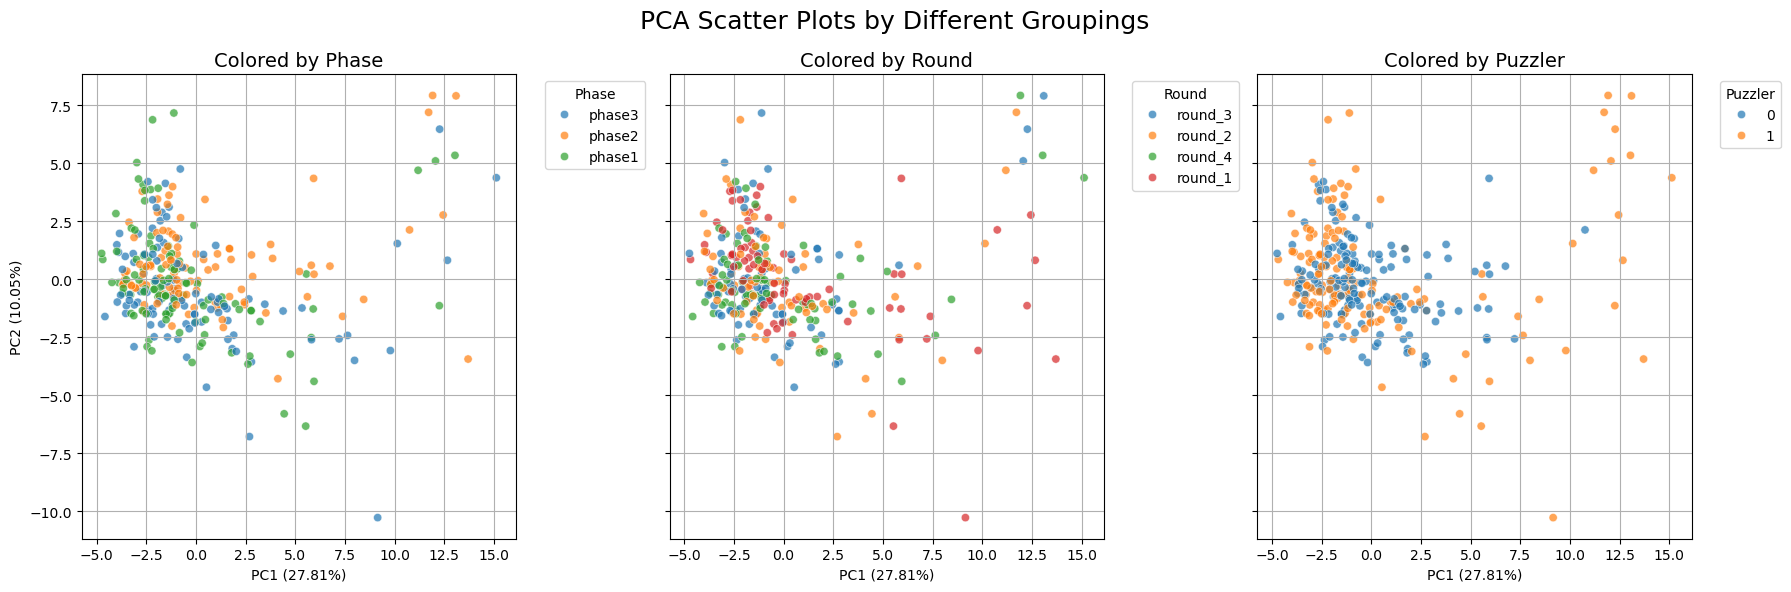

In [42]:
# Fit PCA
pca = PCA()
X_pca = pca.fit_transform(X)

# Create DataFrame for plotting
pc_cols = [f'PC{i+1}' for i in range(X_pca.shape[1])]
df_pca = pd.DataFrame(X_pca, columns=pc_cols)
df_pca['Phase'] = df_standartized['Phase'].values
df_pca['Round'] = df_standartized['Round'].values
df_pca['Puzzler'] = df_standartized['Puzzler'].values

# Variance explained for labels
pc1_var = pca.explained_variance_ratio_[0] * 100
pc2_var = pca.explained_variance_ratio_[1] * 100

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharex=True, sharey=True)

for ax, col, title in zip(axes, ['Phase', 'Round', 'Puzzler'], ['Phase', 'Round', 'Puzzler']):
    sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue=col, palette='tab10', alpha=0.7, ax=ax)
    ax.set_title(f'Colored by {title}', fontsize=14)
    ax.set_xlabel(f'PC1 ({pc1_var:.2f}%)')
    ax.set_ylabel(f'PC2 ({pc2_var:.2f}%)')
    ax.legend(title=col, bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.grid(True)

plt.suptitle("PCA Scatter Plots by Different Groupings", fontsize=18)
plt.tight_layout()
plt.show()